In [1]:
# !pip install seaborn

In [2]:
import pandas as pd

In [3]:
file_path = '/home/aditya_tilak/dataset/'

In [4]:
df = pd.read_csv(file_path)
df.head()

,file_path,insect_name,spectral_centroid,spectral_bandwidth,spectral_flatness,spectral_contrast,rms_energy,zero_crossing_rate,temporal_variance,chroma,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,amplitude,dominant_freq
0,/mnt/external_disk/InsectSound1000/2022329-13-...,Bradysia_difformis,868.058673,1807.606122,0.000033,22.463906,0.007033,0.005529,0.000051,0.769149,...,18.741300,5.191842,18.595085,5.775413,16.200966,6.286120,10.036772,7.713306,0.006153,21.533203
1,/mnt/external_disk/InsectSound1000/2022329-13-...,Bradysia_difformis,855.726824,1750.397580,0.000039,23.451586,0.007388,0.006583,0.000064,0.747856,...,15.324286,3.949085,15.553823,4.236466,12.903663,4.779352,7.934761,7.106397,0.006334,21.533203
2,/mnt/external_disk/InsectSound1000/2022329-13-...,Bradysia_difformis,1696.927875,2203.465441,0.000550,23.557007,0.001780,0.030726,0.000003,0.608342,...,16.363209,-2.997279,18.073927,-3.775580,15.378772,0.543884,10.696812,5.396895,0.001467,32.299805
3,/mnt/external_disk/InsectSound1000/2022329-13-...,Bradysia_difformis,1766.684342,2227.747704,0.000530,23.295593,0.001694,0.035667,0.000003,0.690172,...,16.417042,-2.208392,18.028060,-2.320534,15.786202,0.283279,9.400882,4.262402,0.001383,21.533203
4,/mnt/external_disk/InsectSound1000/2022329-13-...,Bradysia_difformis,1920.159548,2254.109948,0.000718,23.076283,0.001381,0.047020,0.000002,0.678432,...,16.906286,-3.442378,17.417927,-4.904293,14.382904,-0.870850,8.538127,2.789344,0.001142,32.299805


In [5]:
df.columns

Index(['file_path', 'insect_name', 'spectral_centroid', 'spectral_bandwidth',
       'spectral_flatness', 'spectral_contrast', 'rms_energy',
       'zero_crossing_rate', 'temporal_variance', 'chroma', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20', 'amplitude', 'dominant_freq'],
      dtype='object')

Descriptive Statistics for 'dominant_freq':
count    11394.000000
mean        27.766946
std         19.514368
min          0.000000
25%         21.533203
50%         32.299805
75%         32.299805
max        236.865234
Name: dominant_freq, dtype: float64


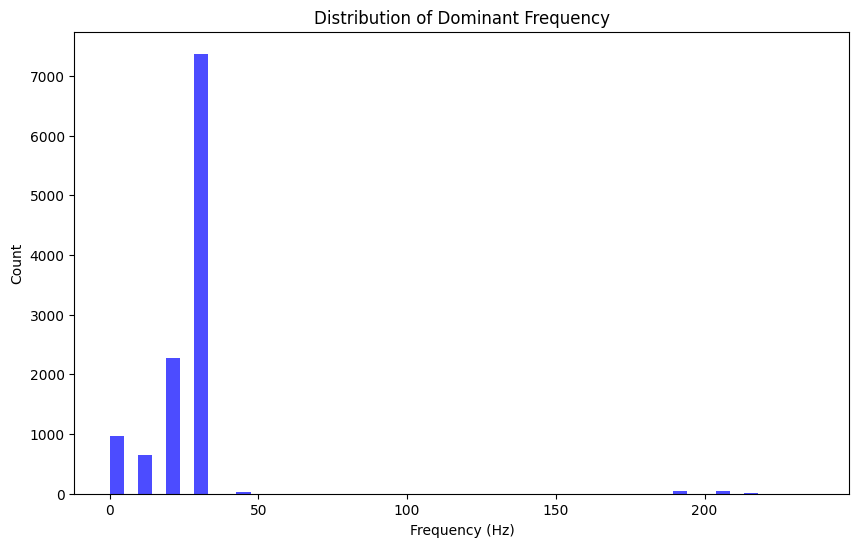

Cluster Centers (Hz): [3.23550702e+01 2.01666729e+02 5.96855898e-13 2.15332031e+01
 1.07666016e+01]


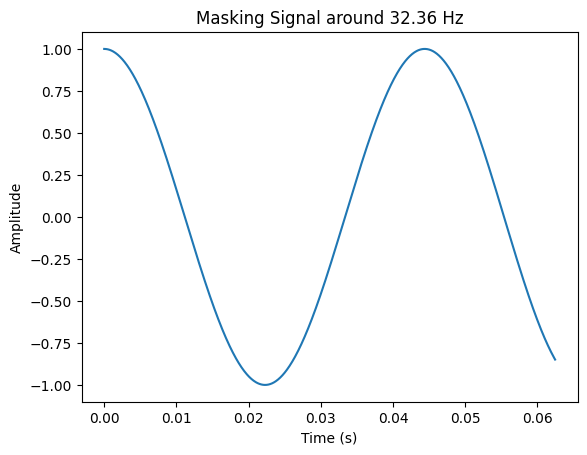

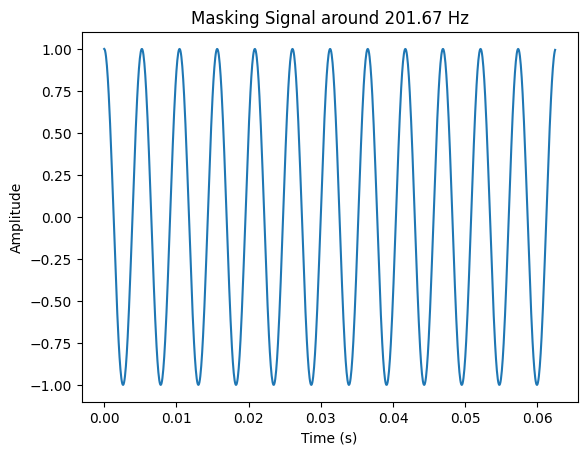

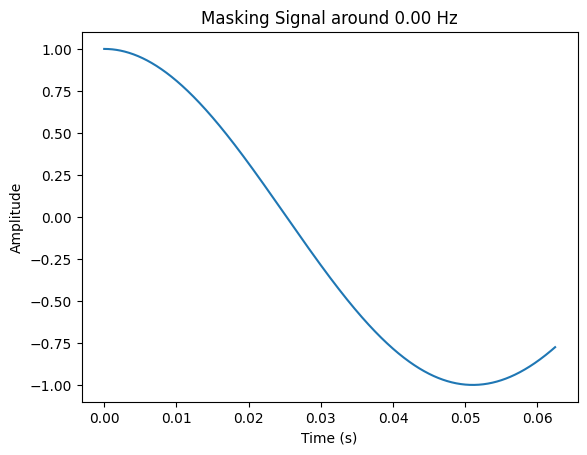

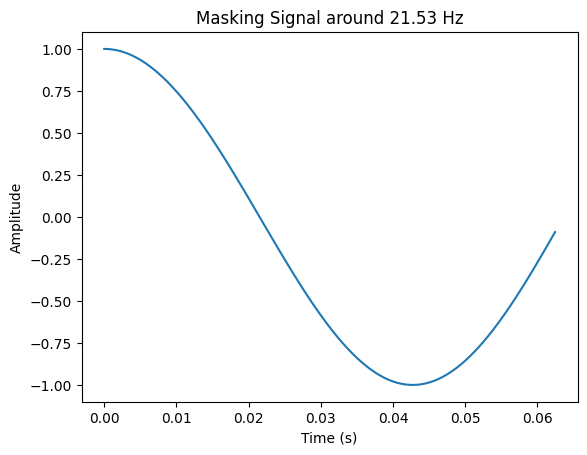

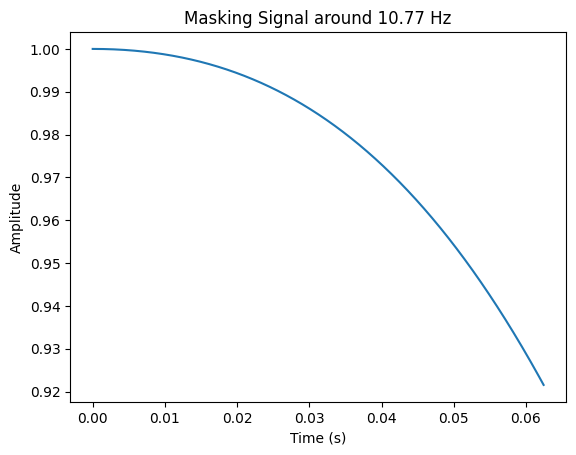

SNR for masking signal around 10.77 Hz: -37.01 dB
SNR for masking signal around 10.77 Hz: -37.02 dB
SNR for masking signal around 10.77 Hz: -36.70 dB
SNR for masking signal around 10.77 Hz: -37.01 dB
SNR for masking signal around 10.77 Hz: -37.06 dB


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.signal import chirp
import os
import librosa
# --- Mask wih Natural Noise ---
folder_path = r'/mnt/external_disk/InsectSound1000'
insect_name = 'Bradysia_'
audio_data_dict = {}

# Load audio files
wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav') and insect_name in f]
for wav_file in wav_files:
    file_path = os.path.join(folder_path, wav_file)
    try:
        audio_data, sample_rate = librosa.load(file_path, sr=None)
        audio_data_dict[wav_file] = {'audio': audio_data, 'sample_rate': sample_rate}
    except Exception as e:
        print(f"Error loading {wav_file}: {e}")
        
random_wav_file = wav_files[0]
natural_signal = audio_data_dict[random_wav_file]['audio']
# natural_signal = natural_signal[:min_length]



# Step 1: Load and preprocess the data
df = pd.read_csv('/home/aditya_tilak/dataset/Bradysia_difformis_features.csv')  # Replace with the actual dataset file name
# df = df.drop(columns=['frequency'])  # Drop the 'frequency' column
if df.isnull().sum().sum() > 0:
    df = df.dropna()  # Remove rows with null values

# Step 2: Analyze the 'dominant_freq' column
dominant_freq = df['dominant_freq']
print("Descriptive Statistics for 'dominant_freq':")
print(dominant_freq.describe())

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(dominant_freq, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Dominant Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Count")
plt.show()

# Step 3: Identify clusters in 'dominant_freq'
# Reshape data for clustering
dominant_freq_reshaped = dominant_freq.values.reshape(-1, 1)
kmeans = KMeans(n_clusters=5, random_state=42)  # Choose the number of clusters
kmeans.fit(dominant_freq_reshaped)
df['cluster'] = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

print("Cluster Centers (Hz):", cluster_centers.flatten())

# Step 4: Generate masking signals
def generate_masking_signal(center, duration=2.5, fs=16000):
    """
    Generate a synthetic signal with variations around a cluster center frequency.
    """
    t = np.linspace(0, duration, int(fs * duration))
    signal = chirp(t, f0=center-10, f1=center+10, t1=duration, method='linear')
    return t, signal

# Example: Generate a masking signal for each cluster center
fs = 16000  # Sampling frequency
masking_signals = []

for center in cluster_centers.flatten():
    t, signal = generate_masking_signal(center, duration=2.5, fs=fs)
    masking_signals.append((t, signal))
    plt.plot(t[:1000], signal[:1000])  # Plot the first 1000 samples for visualization
    plt.title(f"Masking Signal around {center:.2f} Hz")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

# Step 5: Evaluate signal effectiveness (SNR-based evaluation)
def calculate_snr(original, masking):
    """
    Calculate Signal-to-Noise Ratio (SNR).
    """
    noise = masking - original
    snr = 10 * np.log10(np.sum(original ** 2) / np.sum(noise ** 2))
    return snr


# Placeholder for evaluation (replace 'original_signal' with actual pest signal)
original_signal = np.random.normal(0, 0.01, len(t))  # Example original signal
for t, masking_signal in masking_signals:
    snr = calculate_snr(original_signal, masking_signal)
    print(f"SNR for masking signal around {center:.2f} Hz: {snr:.2f} dB")


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dominant_freq is your pandas Series or NumPy array containing the frequencies
# dominant_freq = your_dataframe['dominant_freq']

# Histogram description
def describe_histogram(dominant_freq):
    # Calculate basic statistics
    count = len(dominant_freq)
    mean = np.mean(dominant_freq)
    median = np.median(dominant_freq)
    std = np.std(dominant_freq)
    min_val = np.min(dominant_freq)
    max_val = np.max(dominant_freq)
    bins = 50
    hist, bin_edges = np.histogram(dominant_freq, bins=bins)

    # Calculate histogram peak
    peak_bin = bin_edges[np.argmax(hist)]
    
    description = f"""
    Histogram Description:
    - Count of frequencies: {count}
    - Mean frequency: {mean:.2f} Hz
    - Median frequency: {median:.2f} Hz
    - Standard deviation: {std:.2f} Hz
    - Minimum frequency: {min_val:.2f} Hz
    - Maximum frequency: {max_val:.2f} Hz
    - Frequency peak (most common bin): {peak_bin:.2f} Hz
    - The histogram shows the distribution of dominant frequencies. 
      Observing the shape, we can tell if the frequencies are tightly clustered or spread out. 
      If there is a peak around certain frequencies, we can infer where the frequencies are most concentrated.
    """
    
    return description

# Boxplot description
def describe_boxplot(dominant_freq):
    # Calculate boxplot stats
    q1 = np.percentile(dominant_freq, 25)
    q3 = np.percentile(dominant_freq, 75)
    median = np.median(dominant_freq)
    iqr = q3 - q1
    min_val = np.min(dominant_freq)
    max_val = np.max(dominant_freq)
    outliers = dominant_freq[(dominant_freq < (q1 - 1.5 * iqr)) | (dominant_freq > (q3 + 1.5 * iqr))]

    description = f"""
    Boxplot Description:
    - Minimum frequency: {min_val:.2f} Hz
    - Q1 (25th percentile): {q1:.2f} Hz
    - Median (50th percentile): {median:.2f} Hz
    - Q3 (75th percentile): {q3:.2f} Hz
    - Maximum frequency: {max_val:.2f} Hz
    - Interquartile Range (IQR): {iqr:.2f} Hz
    - Outliers: {len(outliers)} frequencies identified as outliers.

    The boxplot shows the spread of the dominant frequencies. The median represents the central frequency, 
    while the IQR indicates where most frequencies fall. Frequencies outside the whiskers are considered outliers.
    """
    
    return description

# Generate descriptions
histogram_description = describe_histogram(df['dominant_freq'])
boxplot_description = describe_boxplot(df['dominant_freq'])

# Print the results
print(histogram_description)
print("\n" + "-"*50 + "\n")
print(boxplot_description)



    Histogram Description:
    - Count of frequencies: 11394
    - Mean frequency: 27.77 Hz
    - Median frequency: 32.30 Hz
    - Standard deviation: 19.51 Hz
    - Minimum frequency: 0.00 Hz
    - Maximum frequency: 236.87 Hz
    - Frequency peak (most common bin): 28.42 Hz
    - The histogram shows the distribution of dominant frequencies. 
      Observing the shape, we can tell if the frequencies are tightly clustered or spread out. 
      If there is a peak around certain frequencies, we can infer where the frequencies are most concentrated.
    

--------------------------------------------------


    Boxplot Description:
    - Minimum frequency: 0.00 Hz
    - Q1 (25th percentile): 21.53 Hz
    - Median (50th percentile): 32.30 Hz
    - Q3 (75th percentile): 32.30 Hz
    - Maximum frequency: 236.87 Hz
    - Interquartile Range (IQR): 10.77 Hz
    - Outliers: 1071 frequencies identified as outliers.

    The boxplot shows the spread of the dominant frequencies. The median repres


    Histogram Description:
    - Count of frequencies: 11394
    - Mean frequency: 27.77 Hz
    - Median frequency: 32.30 Hz
    - Standard deviation: 19.51 Hz
    - Minimum frequency: 0.00 Hz
    - Maximum frequency: 236.87 Hz
    - Frequency peak (most common bin): 28.42 Hz
    - The histogram shows the distribution of dominant frequencies. 
      Observing the shape, we can tell if the frequencies are tightly clustered or spread out. 
      If there is a peak around certain frequencies, we can infer where the frequencies are most concentrated.
    

--------------------------------------------------


    Boxplot Description:
    - Minimum frequency: 0.00 Hz
    - Q1 (25th percentile): 21.53 Hz
    - Median (50th percentile): 32.30 Hz
    - Q3 (75th percentile): 32.30 Hz
    - Maximum frequency: 236.87 Hz
    - Interquartile Range (IQR): 10.77 Hz
    - Outliers: 1071 frequencies identified as outliers.

    The boxplot shows the spread of the dominant frequencies. The median repres

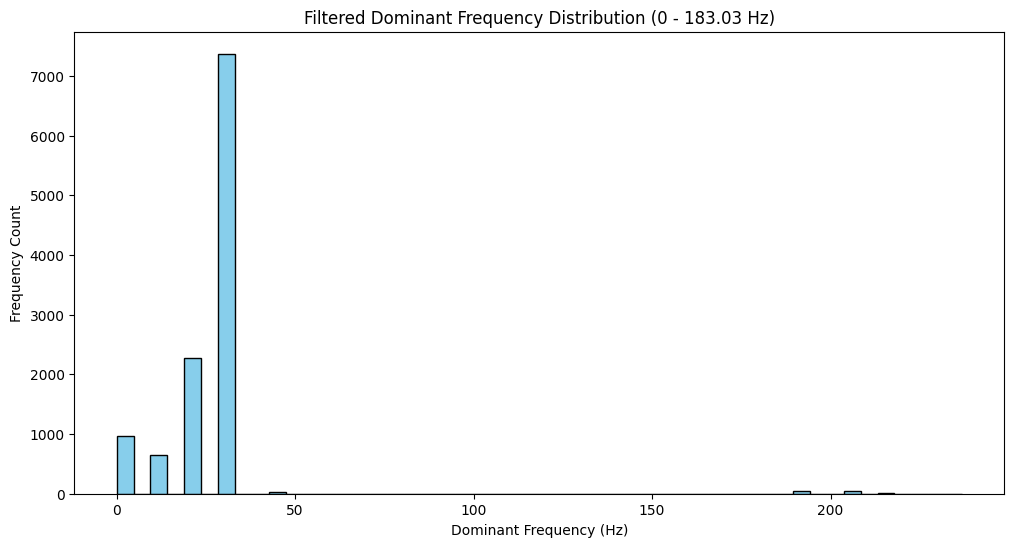

In [10]:
# Filter the frequencies to focus on the relevant range: 0 Hz to 183.03 Hz
filtered_freq = dominant_freq[(dominant_freq >= 0) & (dominant_freq <= 236.87)]

# Generate description of the filtered data
filtered_histogram_description = describe_histogram(filtered_freq)
filtered_boxplot_description = describe_boxplot(filtered_freq)

# Print the filtered histogram and boxplot descriptions
print(filtered_histogram_description)
print("\n" + "-"*50 + "\n")
print(filtered_boxplot_description)

# If you want to visualize the filtered data
plt.figure(figsize=(12, 6))
plt.hist(filtered_freq, bins=50, color='skyblue', edgecolor='black')
plt.title('Filtered Dominant Frequency Distribution (0 - 183.03 Hz)')
plt.xlabel('Dominant Frequency (Hz)')
plt.ylabel('Frequency Count')
plt.show()


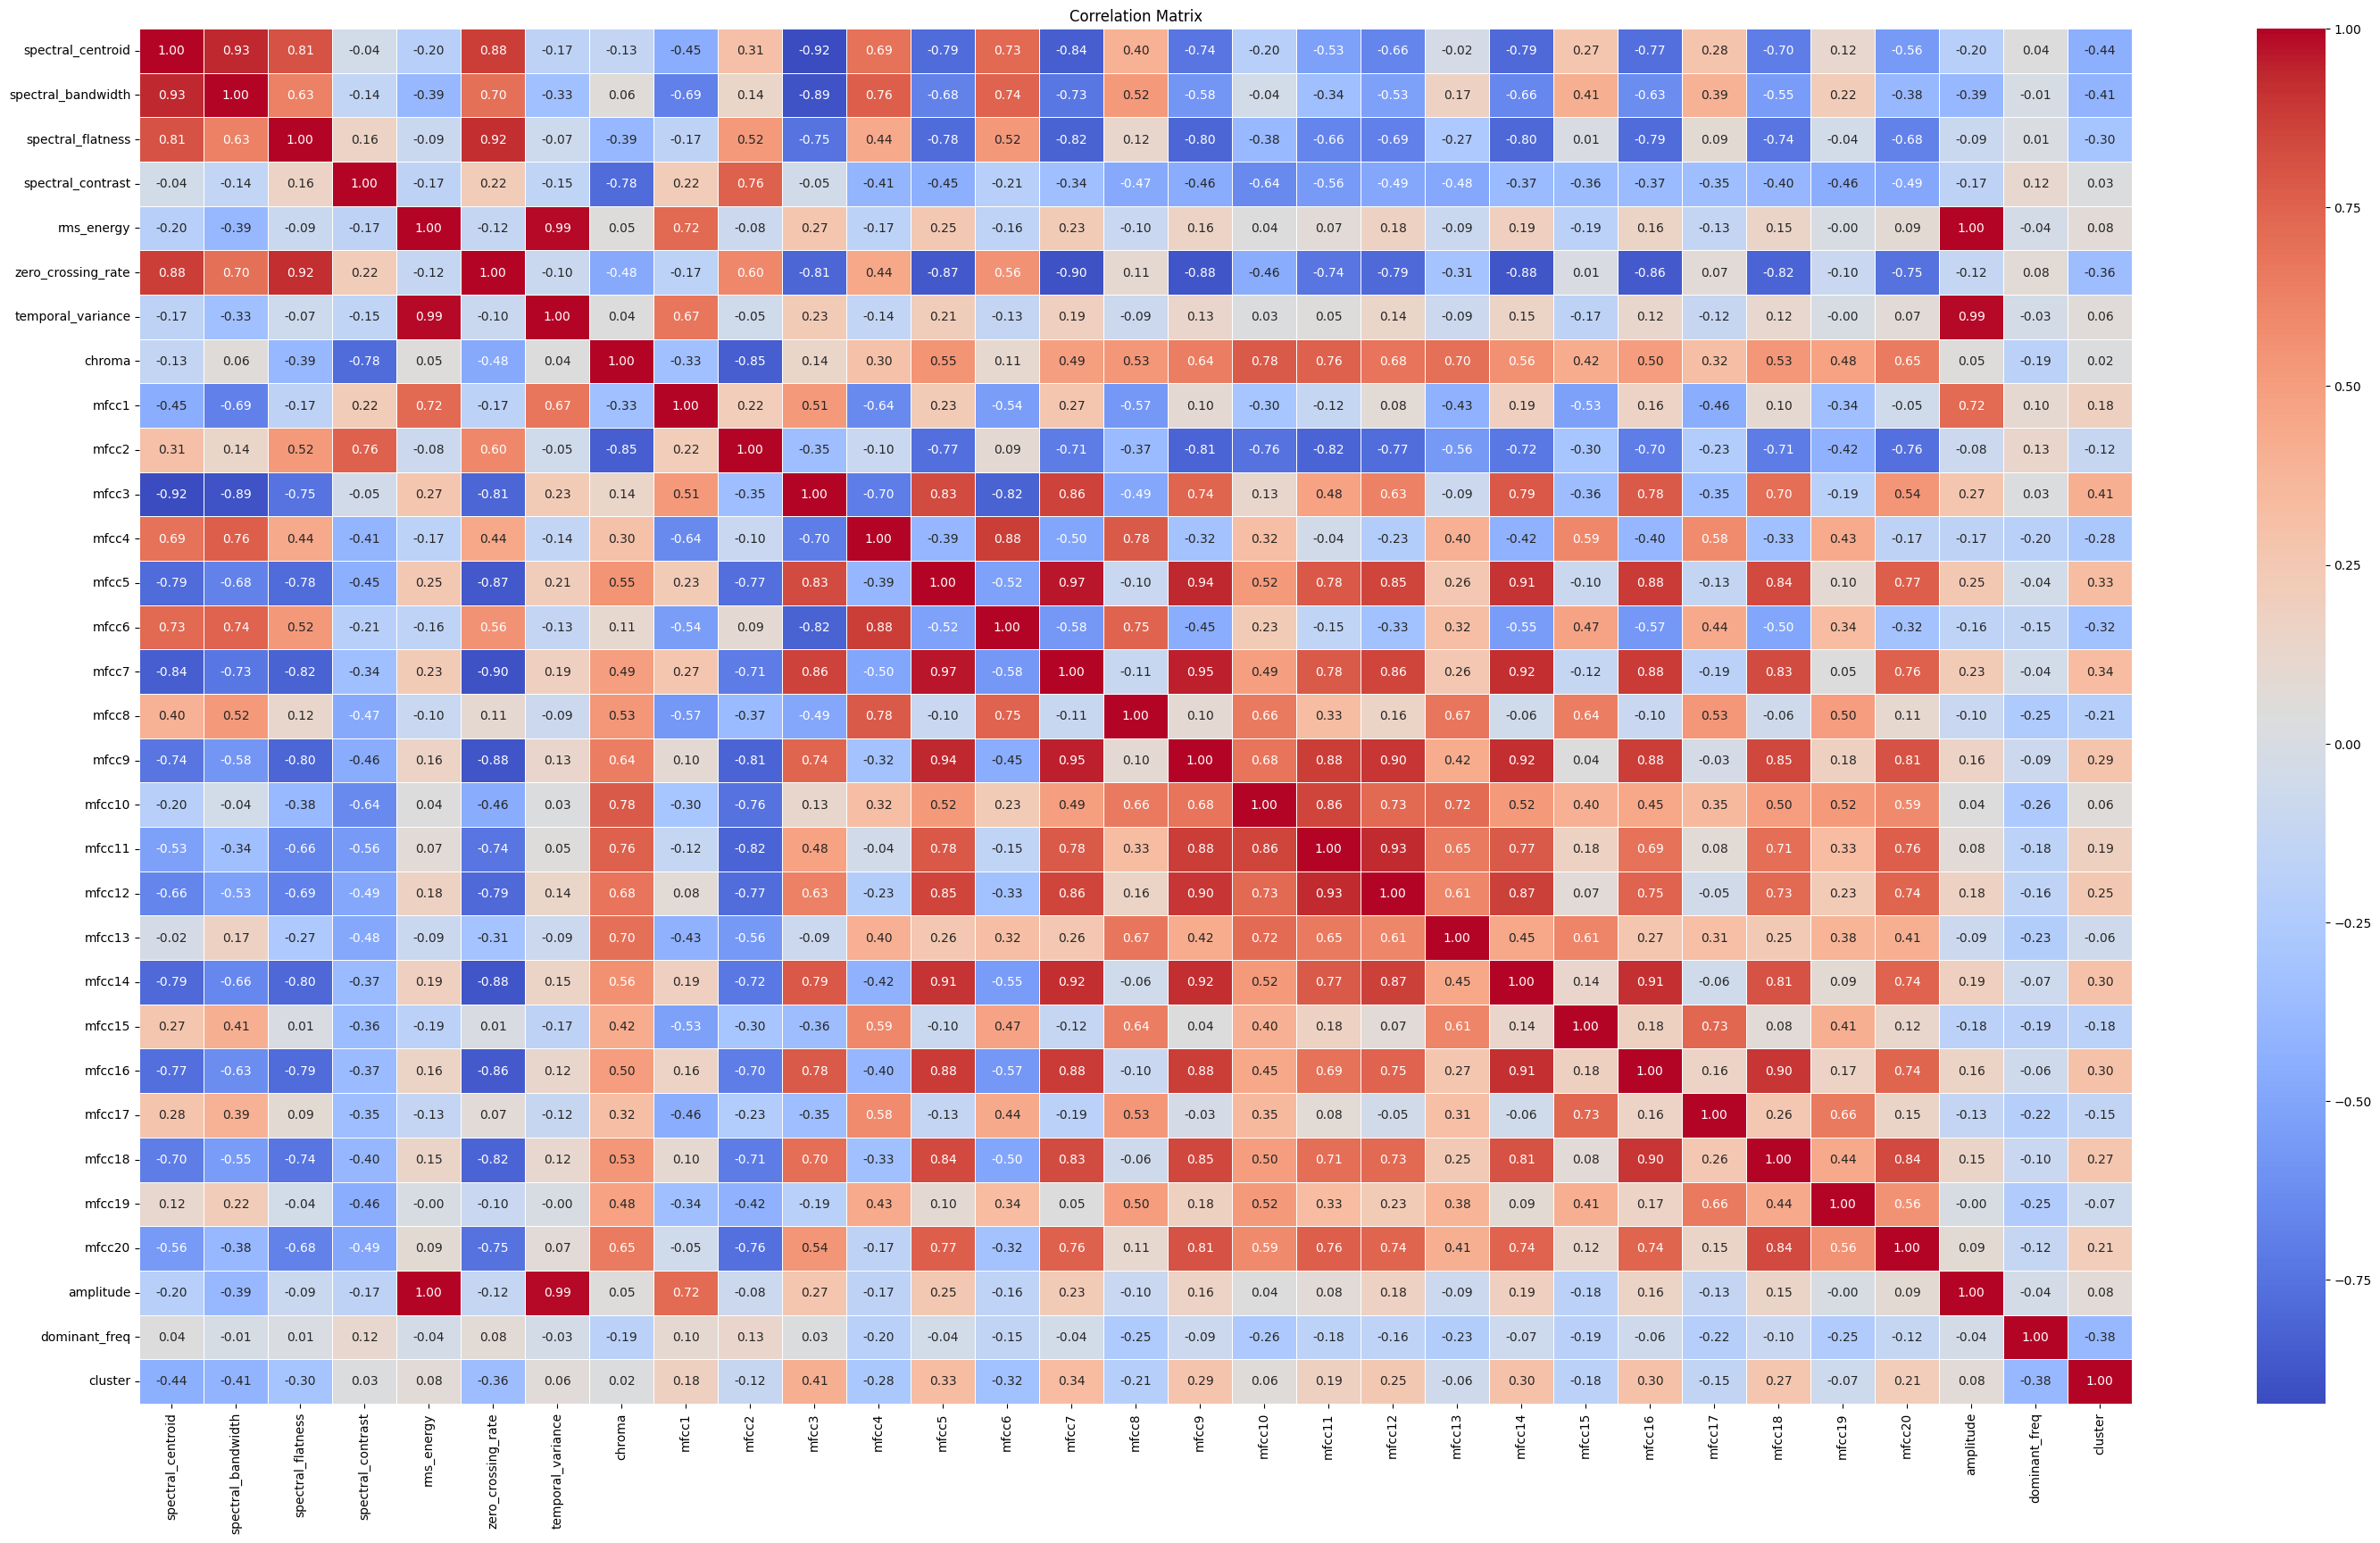

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_features = df.drop(['file_path','insect_name'], axis = 1)

# Assuming df is your dataframe loaded with the relevant features
correlation_matrix = df_features.corr()

# Plotting the correlation matrix
plt.figure(figsize=(36, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


Explained Variance by each component: [0.44665491 0.24746845 0.10517413 0.04473378 0.03171141 0.02875768
 0.02314172 0.01423626 0.01195155 0.00808288 0.0069958  0.00563671
 0.0046542  0.004168   0.00360471 0.00285022 0.00213672 0.00182807
 0.00159216 0.00136392]


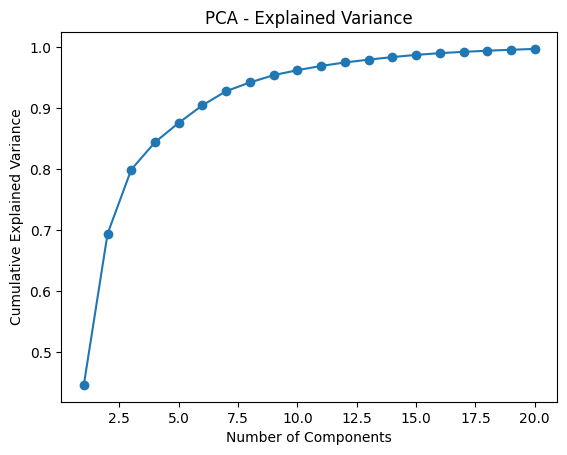

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract features (X) and target (y)
X = df_features.drop(columns=["dominant_freq"])  # Remove non-feature columns
y = df_features["dominant_freq"]

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=20)  # Keep the top 10 principal components
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio to understand how much variance each component explains
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by each component: {explained_variance}')

# Optionally, you can plot the cumulative explained variance to decide how many components to keep
import matplotlib.pyplot as plt
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.show()


In [13]:
import numpy as np
import pandas as pd

# Get the loadings of the first 5 components
pca_loadings = pca.components_[:12]

# Create a DataFrame to view feature contributions for each component
feature_names = X.columns  # Assuming X_scaled has the feature names
pca_loadings_df = pd.DataFrame(pca_loadings.T, columns=[f'PC{i+1}' for i in range(12)], index=feature_names)

# Get the top 5 features based on the absolute value of the loadings
top_5_features = pca_loadings_df.abs().mean(axis=1).sort_values(ascending=False).head(12)
print("Top 5 Features based on PCA component loadings:")
print(top_5_features)


Top 5 Features based on PCA component loadings:
spectral_contrast    0.197723
mfcc19               0.192796
mfcc15               0.185211
mfcc17               0.176810
mfcc13               0.175696
mfcc10               0.171911
mfcc20               0.170984
spectral_flatness    0.169045
mfcc8                0.169029
cluster              0.168990
mfcc6                0.160763
chroma               0.159545
dtype: float64


In [14]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train Random Forest model
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# print('ok')
# rf.fit(X_train, y_train)
# print('n ok')

# # Get feature importance
# importances = rf.feature_importances_

# # Sort features by importance
# sorted_idx = importances.argsort()[::-1]
# features = X.columns

# # Plot feature importances
# plt.figure(figsize=(10, 6))
# plt.barh(features[sorted_idx], importances[sorted_idx])
# plt.xlabel('Feature Importance')
# plt.title('Feature Importance - Random Forest')
# plt.show()


In [15]:
max_freq = df_features['dominant_freq'].max()
max_freq

np.float64(236.865234375)

In [16]:
df_features['amplitude'].max()

np.float64(3.1609654)

In [22]:
# Solution

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import os
import librosa

In [24]:
sr = 16000  # Sample rate
duration = 2.5  # Signal duration in seconds
min_freq = 0  # Minimum frequency for frequency modulation
max_freq = 290.698  # Maximum frequency for frequency modulation
freq_bands = [(0, 29), (29, 58), (58, 87), (87, 116), (116, 145), (145, 174), (174, 203),(203,232),(232,261),(261,290)] 
num_hops = 25  # Number of frequency hops
hop_duration = duration / num_hops  # Duration of each hop

# --- Generate Time Vector ---
t = np.linspace(0, duration, int(sr * duration), endpoint=False)

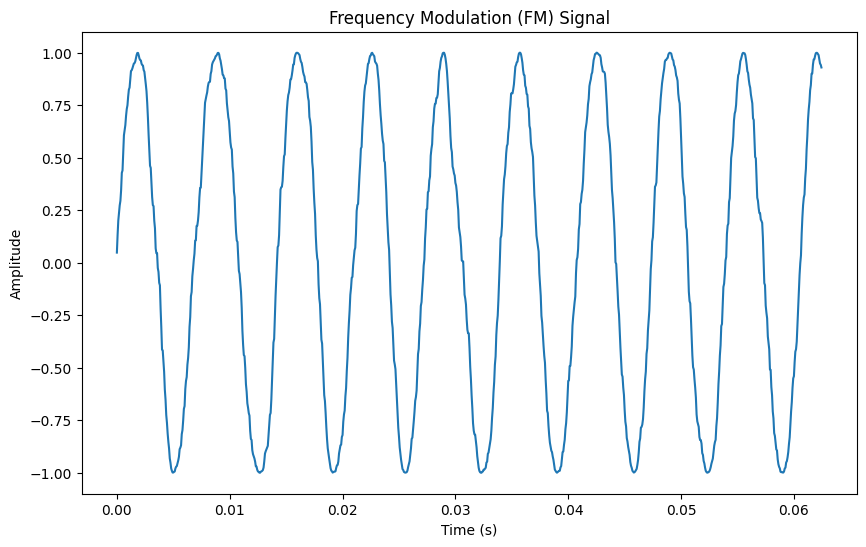

In [25]:
freq_ch = np.random.uniform(min_freq, max_freq, size=len(t))  # Random frequency changes
fm_signal = np.sin(2 * np.pi * np.cumsum(freq_ch / sr))  # FM signal

# Plot FM signal
plt.figure(figsize=(10, 6))
plt.plot(t[:1000], fm_signal[:1000])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Frequency Modulation (FM) Signal')
plt.show()

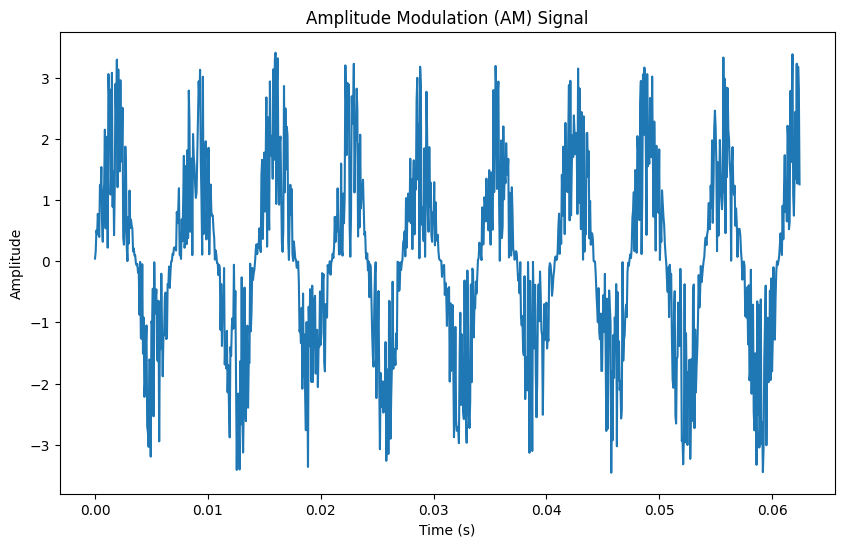

In [26]:
amplitude_modulation = np.random.uniform(0, 3.522, size=len(t))  # Random amplitude modulation
am_signal = fm_signal * amplitude_modulation  # Apply amplitude modulation

# Plot AM signal
plt.figure(figsize=(10, 6))
plt.plot(t[:1000], am_signal[:1000])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Amplitude Modulation (AM) Signal')
plt.show()

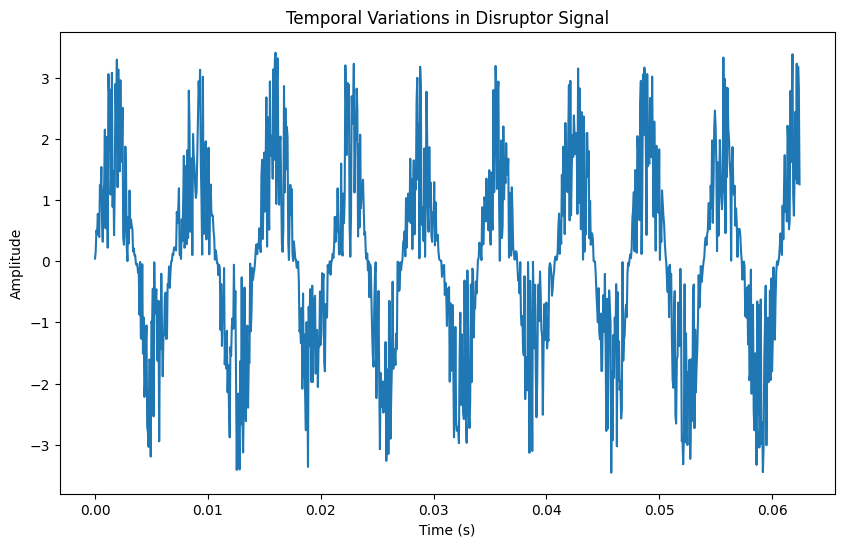

In [27]:
# --- Temporal Variations ---
burst_intervals = np.random.uniform(0.1, 0.4, size=5)  # Random burst intervals
burst_durations = np.random.uniform(0.2, 0.3, size=5)  # Random burst durations
signal_with_bursts = np.zeros(len(t))

start_idx = 0
for interval, duration in zip(burst_intervals, burst_durations):
    end_idx = int(start_idx + duration * sr)
    signal_with_bursts[start_idx:end_idx] = am_signal[start_idx:end_idx]
    start_idx = int(end_idx + interval * sr)

# Plot temporal variations
plt.figure(figsize=(10, 6))
plt.plot(t[:1000], signal_with_bursts[:1000])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Temporal Variations in Disruptor Signal')
plt.show()

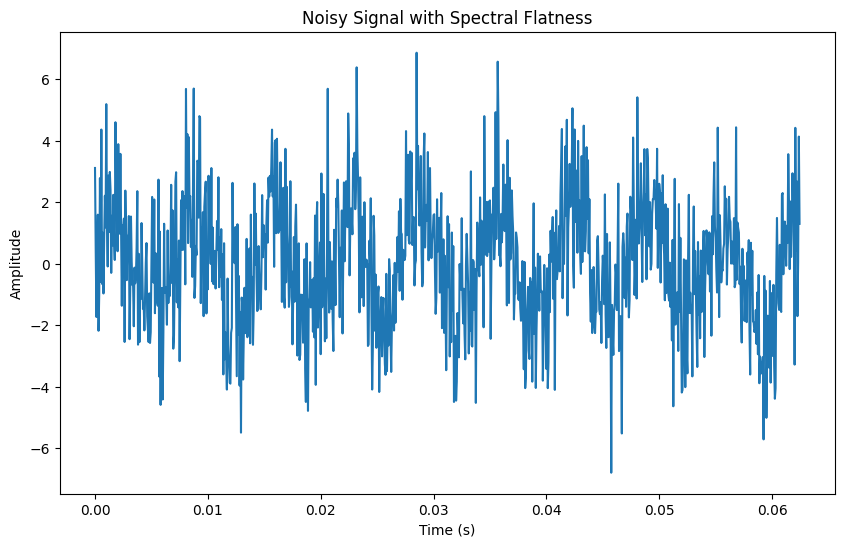

In [28]:
# --- Add White Noise ---
white_noise = np.random.normal(0, 1.5, len(t))  # Generate white noise
noisy_signal = signal_with_bursts + white_noise  # Combine signal with noise

# Plot noisy signal
plt.figure(figsize=(10, 6))
plt.plot(t[:1000], noisy_signal[:1000])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Noisy Signal with Spectral Flatness')
plt.show()

In [29]:
# --- Frequency Hopping ---
freq_hopping_signal = np.zeros_like(t)
for i in range(num_hops):
    low, high = freq_bands[np.random.randint(0, len(freq_bands))]
    freq = np.random.uniform(low, high)
    hop_start = int(i * hop_duration * sr)
    hop_end = int((i + 1) * hop_duration * sr)
    hop_t = t[hop_start:hop_end]
    sine_wave = np.sin(2 * np.pi * freq * hop_t)
    freq_hopping_signal[hop_start:hop_end] = sine_wave

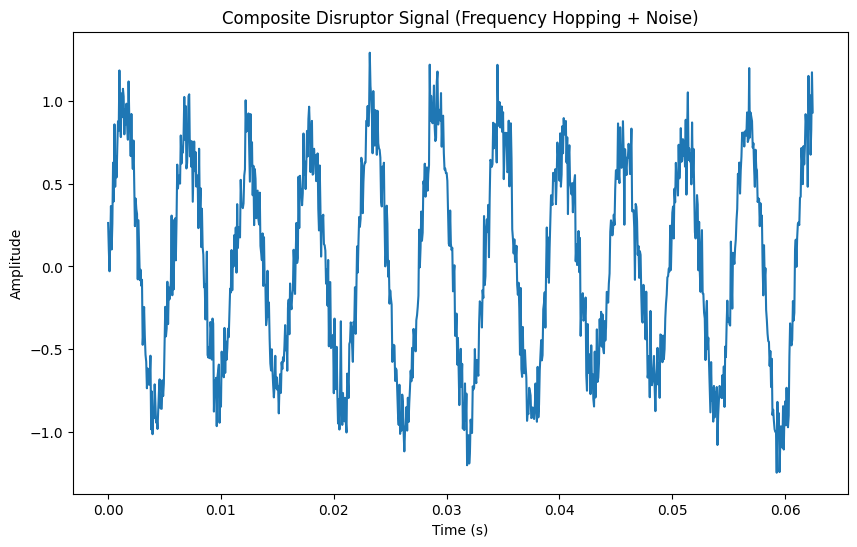

In [30]:
# --- Combine Signals ---
freq_hopping_signal = freq_hopping_signal / np.max(np.abs(freq_hopping_signal))  # Normalize
noisy_signal = noisy_signal / np.max(np.abs(noisy_signal))  # Normalize
composite_signal = freq_hopping_signal + noisy_signal  # Combine frequency hopping and noise
composite_signal = (composite_signal / np.max(np.abs(composite_signal))) * 1.5
  # Prevent clipping

# Plot composite signal
plt.figure(figsize=(10, 6))
plt.plot(t[:1000], composite_signal[:1000])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Composite Disruptor Signal (Frequency Hopping + Noise)')
plt.show()


In [31]:
# # --- Mask with Natural Noise ---
# folder_path = r'/mnt/external_disk/InsectSound1000'
# insect_name = 'Bombus_'
# audio_data_dict = {}

# # Load audio files
# wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav') and insect_name in f]
# for wav_file in wav_files:
#     file_path = os.path.join(folder_path, wav_file)
#     try:
#         audio_data, sample_rate = librosa.load(file_path, sr=None)
#         audio_data_dict[wav_file] = {'audio': audio_data, 'sample_rate': sample_rate}
#     except Exception as e:
#         print(f"Error loading {wav_file}: {e}")


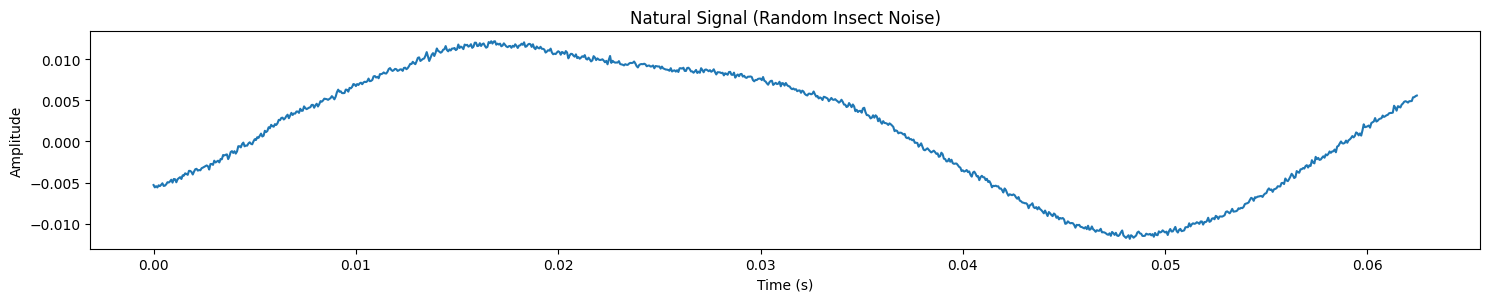

In [20]:
# Pick a random file for masking
random_wav_file = wav_files[0]
natural_signal = audio_data_dict[random_wav_file]['audio']
# min_length = min(len(composite_signal), len(natural_signal))
# composite_signal = composite_signal[:min_length]
# natural_signal = natural_signal[:min_length]

# # Combine signals
# masked_signal = composite_signal + natural_signal
# masked_signal = masked_signal / np.max(np.abs(masked_signal))  # Normalize

# Plot composite signal, masked signal, and natural signal
plt.figure(figsize=(15, 8))

# # Composite signal
# plt.subplot(3, 1, 1)
# plt.plot(t[:1000], composite_signal[:1000])
# plt.title('Composite Signal (Frequency Hopping + Noise)')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')

# # Masked signal
# plt.subplot(3, 1, 2)
# plt.plot(t[:1000], masked_signal[:1000])
# plt.title('Masked Signal (Composite + Natural Noise)')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')

# Natural signal
plt.subplot(3, 1, 3)
plt.plot(t[:1000], natural_signal[:1000])
plt.title('Natural Signal (Random Insect Noise)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Adjust layout
plt.tight_layout()
plt.show()

# # --- Save Signals ---
# sf.write('composite_disruptor_signal.wav', composite_signal, sr)
# sf.write('masked_disruptor_signal.wav', masked_signal, sr)


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fft import fft, fftfreq
from scipy.stats import entropy
import librosa

In [34]:
import os
import numpy as np
import pandas as pd
from scipy.io import wavfile
from scipy.signal import correlate
import librosa

# Function to calculate cross-correlation (for comparing the signals)
def cross_correlation(signal1, signal2):
    correlation = correlate(signal1, signal2, mode='same')
    return np.max(correlation) / (np.linalg.norm(signal1) * np.linalg.norm(signal2))

# Function to process each WAV file and extract features
def process_file(file_path, audio_data, sample_rate):
    # Normalize the signal
    signal = audio_data / np.max(np.abs(audio_data))  

    # Generate a masked signal
    mask_signal = np.random.normal(0, 0.5, len(signal))  # Example mask (replace with your actual mask)
    masked_signal = signal + mask_signal  # Composite signal with masking

    # Calculate features
    snr_composite = calculate_snr(signal, mask_signal)
    snr_masked = calculate_snr(masked_signal, mask_signal)
    rms_composite = compute_rms_energy(signal)
    rms_masked = compute_rms_energy(masked_signal)
    rms_natural = compute_rms_energy(mask_signal)
    
    entropy_composite = calculate_entropy(signal)
    entropy_masked = calculate_entropy(masked_signal)
    entropy_natural = calculate_entropy(mask_signal)

    dominant_freq_composite = get_dominant_frequency(signal, sample_rate)
    dominant_freq_masked = get_dominant_frequency(masked_signal, sample_rate)
    dominant_freq_natural = get_dominant_frequency(mask_signal, sample_rate)

    spectral_centroid_composite = get_spectral_centroid(signal, sample_rate)
    spectral_centroid_masked = get_spectral_centroid(masked_signal, sample_rate)
    spectral_centroid_natural = get_spectral_centroid(mask_signal, sample_rate)

    cross_corr_score = cross_correlation(signal, mask_signal)

    # Collect all data into a dictionary
    file_results = {
        "file_name": os.path.basename(file_path),
        "SNR_composite": snr_composite,
        "SNR_masked": snr_masked,
        "RMS_energy_composite": rms_composite,
        "RMS_energy_masked": rms_masked,
        "RMS_energy_natural": rms_natural,
        "entropy_composite": entropy_composite,
        "entropy_masked": entropy_masked,
        "entropy_natural": entropy_natural,
        "dominant_freq_composite": dominant_freq_composite,
        "dominant_freq_masked": dominant_freq_masked,
        "dominant_freq_natural": dominant_freq_natural,
        "spectral_centroid_composite": spectral_centroid_composite,
        "spectral_centroid_masked": spectral_centroid_masked,
        "spectral_centroid_natural": spectral_centroid_natural,
        "cross_correlation_score": cross_corr_score
    }

    return file_results

# Function to calculate Signal-to-Noise Ratio (SNR)
def calculate_snr(signal, noise):
    signal_power = np.sum(signal**2) / len(signal)
    noise_power = np.sum(noise**2) / len(noise)
    return 10 * np.log10(signal_power / noise_power)

# Function to compute RMS energy
def compute_rms_energy(signal):
    return np.sqrt(np.mean(signal**2))

# Function to calculate entropy
def calculate_entropy(signal):
    normalized_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal))
    hist, _ = np.histogram(normalized_signal, bins=256, density=True)
    return -np.sum(hist * np.log2(hist + np.finfo(float).eps))

# Function to get dominant frequency
def get_dominant_frequency(signal, sr):
    N = len(signal)
    freqs = np.fft.fftfreq(N, 1/sr)
    spectrum = np.abs(np.fft.fft(signal))[:N//2]
    return freqs[np.argmax(spectrum)]

# Function to calculate spectral centroid
def get_spectral_centroid(signal, sr):
    N = len(signal)
    freqs = np.fft.fftfreq(N, 1/sr)[:N//2]
    spectrum = np.abs(np.fft.fft(signal))[:N//2]
    return np.sum(freqs * spectrum) / np.sum(spectrum)



In [38]:
# Directory containing the WAV files
folder_path = '/mnt/external_disk/InsectSound1000'
insect_name = 'Aphidoletes_'  # Insect name filter for files
audio_data_dict = {}

# Load audio files
wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav') and insect_name in f]
all_file_results = []

# Iterate through all WAV files in the folder
for wav_file in wav_files:
    # file_path = os.path.join(folder_path, wav_file)
    try:
    #     audio_data, sample_rate = librosa.load(file_path, sr=None)  # Load the audio using librosa
    #     audio_data_dict[wav_file] = {'audio': audio_data, 'sample_rate': sample_rate}
        
        # Process the file and get results
        file_results = process_file(file_path, audio_data, sample_rate)
        all_file_results.append(file_results)

    except Exception as e:
        print(f"Error loading {wav_file}: {e}")

# Create a DataFrame from all results
df = pd.DataFrame(all_file_results)

# Save the DataFrame to a CSV file



In [39]:
output_csv_path = 'masking_signal_analysis_results.csv'
df.to_csv(output_csv_path, index=False)

In [40]:
# Get a summary of statistics for the numerical columns
summary_stats = df.describe()
summary_stats

,SNR_composite,SNR_masked,RMS_energy_composite,RMS_energy_masked,RMS_energy_natural,entropy_composite,entropy_masked,entropy_natural,dominant_freq_composite,dominant_freq_masked,dominant_freq_natural,spectral_centroid_composite,spectral_centroid_masked,spectral_centroid_natural,cross_correlation_score
count,14065.000000,14065.000000,14065.000000,14065.000000,14065.000000,1.406500e+04,14065.000000,14065.000000,1.406500e+04,14065.000000,14065.000000,1.406500e+04,14065.000000,14065.000000,14065.000000
mean,-5.982520,0.976734,0.251097,0.559508,0.500000,-2.020697e+02,-261.435995,-260.916952,3.600000e+00,4.035123,4015.821002,2.027131e+03,3861.054970,3999.661771,0.015615
std,0.030703,0.018618,0.000000,0.001928,0.001767,5.684544e-14,17.281731,17.353812,8.882100e-16,2.243323,2318.896220,4.547635e-13,8.393315,8.473392,0.002051
min,-6.116008,0.904712,0.251097,0.551546,0.493058,-2.020697e+02,-350.503019,-346.097357,3.600000e+00,3.600000,0.000000,2.027131e+03,3826.481845,3966.085598,0.009635
25%,-6.002996,0.964024,0.251097,0.558222,0.498805,-2.020697e+02,-272.317047,-271.823720,3.600000e+00,3.600000,1976.000000,2.027131e+03,3855.360224,3993.995573,0.014186
50%,-5.982322,0.976809,0.251097,0.559497,0.499985,-2.020697e+02,-260.183400,-259.500110,3.600000e+00,3.600000,4043.600000,2.027131e+03,3861.018234,3999.677653,0.015440
75%,-5.961787,0.989141,0.251097,0.560799,0.501177,-2.020697e+02,-248.998551,-248.579428,3.600000e+00,3.600000,6026.400000,2.027131e+03,3866.708563,4005.328482,0.016844
max,-5.861146,1.048751,0.251097,0.567923,0.507740,-2.020697e+02,-205.628268,-208.439163,3.600000e+00,15.600000,7999.600000,2.027131e+03,3892.607231,4031.590266,0.025959


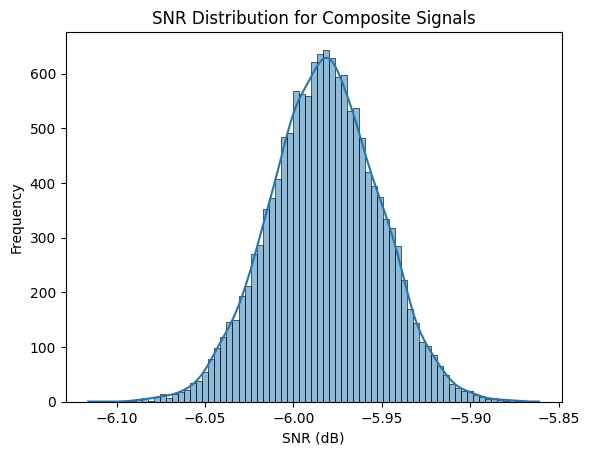

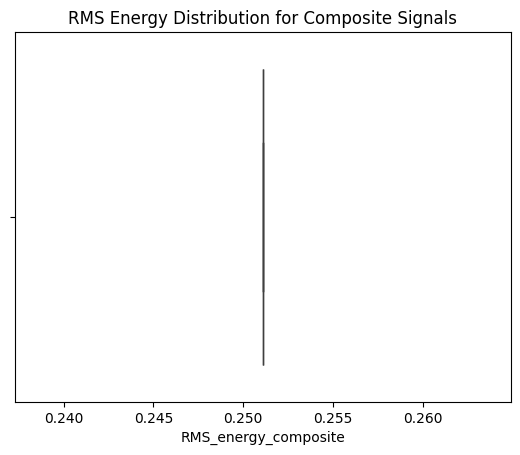

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Histogram for SNR_composite
sns.histplot(df['SNR_composite'], kde=True)
plt.title('SNR Distribution for Composite Signals')
plt.xlabel('SNR (dB)')
plt.ylabel('Frequency')
plt.show()

# Example: Boxplot for RMS energy
sns.boxplot(x='RMS_energy_composite', data=df)
plt.title('RMS Energy Distribution for Composite Signals')
plt.show()


In [43]:
# Calculate the correlation matrix
df = df.drop(df['file_name'], axis = 1)
corr_matrix = df.corr()

# Visualize it with a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()


KeyError: "['202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav', '202254-16-17_Aphidoletes_aphidimyza_000023_s23_ch1.wav'] not found in axis"

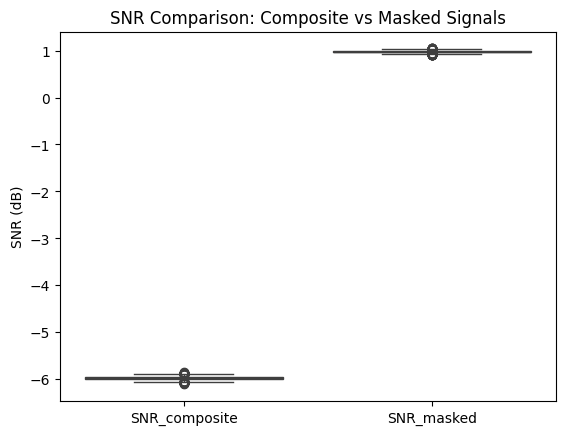

In [44]:
sns.boxplot(data=df[['SNR_composite', 'SNR_masked']])
plt.title('SNR Comparison: Composite vs Masked Signals')
plt.ylabel('SNR (dB)')
plt.show()
